## Business Grouping

#### Data loading (153 MB)

In [24]:
import pandas as pd

# read the entire file into a python array
with open('../yelp_dataset/yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)
print("business.json contains %i records, each composed by %i columns." % (df.shape[0], df.shape[1]))

business.json contains 209393 records, each composed by 14 columns.


#### Data preview

In [2]:
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{u'BusinessParking': u'{'garage': False, 'stre...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{u'Monday': u'10:0-18:0', u'Tuesday': u'11:0-2...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{u'GoodForKids': u'True', u'ByAppointmentOnly'...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ
2,3554 Rue Notre-Dame O,None,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,None,1,45.479984,-73.580070,Felinus,H4C 1P4,5,5.0,QC
3,1015 Sharp Cir,"{u'DogsAllowed': u'True', u'BusinessParking': ...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{u'Friday': u'7:0-16:0', u'Tuesday': u'7:0-16:...",0,36.219728,-115.127725,Nevada House of Hose,89030,3,2.5,NV
4,4827 E Downing Cir,"{u'BusinessAcceptsCreditCards': u'True', u'ByA...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{u'Friday': u'9:0-16:0', u'Tuesday': u'9:0-16:...",1,33.428065,-111.726648,USE MY GUY SERVICES LLC,85205,26,4.5,AZ


#### Categories extraction

In [28]:
c = []
for el in df_las_vegas['categories']:
    for cat in str(el).split(', '):
        if cat not in c:
            c.append(cat)
            
categories = {}
for cat in c:
    categories[cat] = []

for el in df_las_vegas.to_dict('records'):
    if el['categories'] != None:
        for cat in el['categories'].split(', '):
            categories[cat].append(el['name'])
            
categories_counts = [{'cat': cat, 'count': len(categories[cat])} for cat in categories]
categories_counts = sorted(categories_counts, key=lambda x: x['count'], reverse=True)
len(categories)

1207

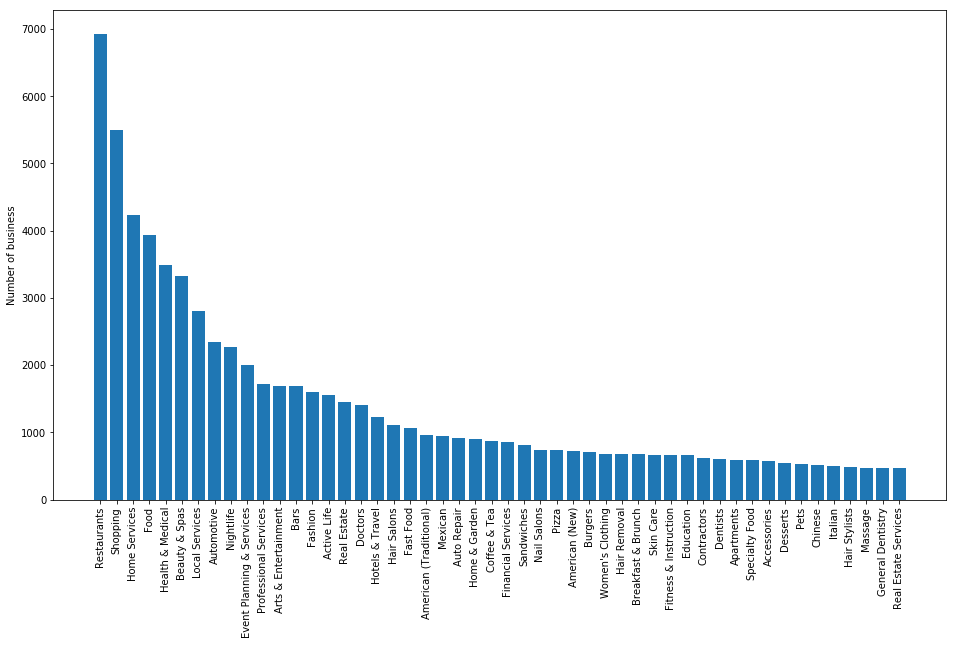

In [11]:
import matplotlib.pyplot as plt

n_cat = 50

fig, ax = plt.subplots(figsize=(16, 9))
x = [el['cat'] for el in categories_counts]
y = [el['count'] for el in categories_counts]
plt.bar(x[:n_cat], y[:n_cat])
ax.set_ylabel('Number of business')
plt.xticks(rotation='vertical')
plt.show()

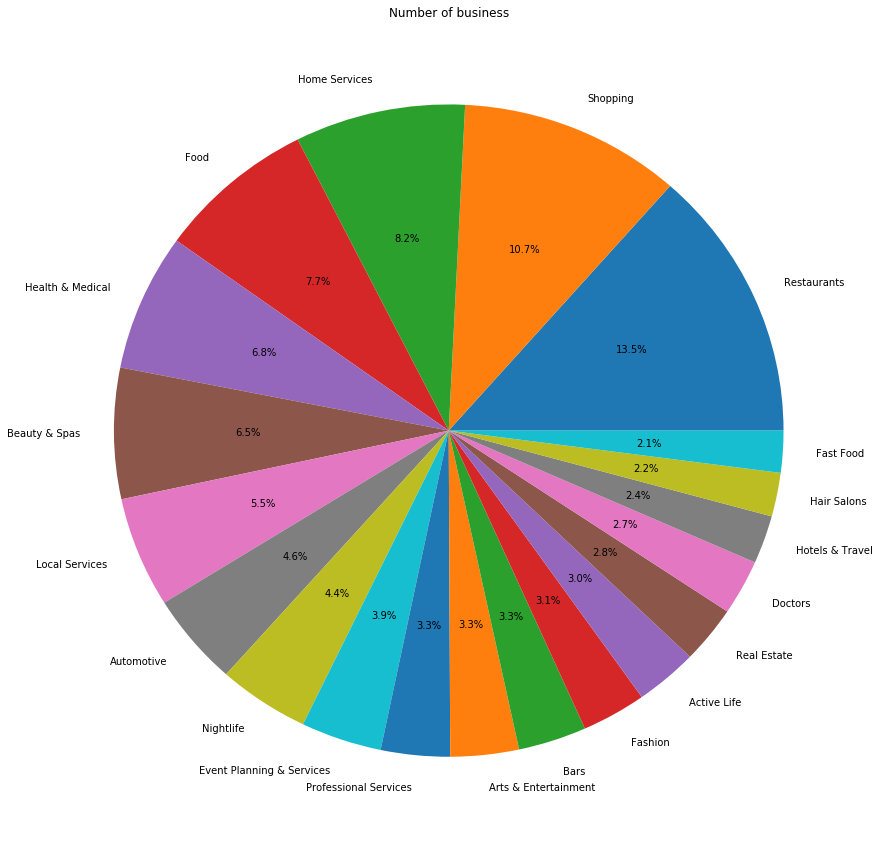

In [25]:
n_cat2 = 20

fig, ax = plt.subplots(figsize=(15, 15))
x = [el['cat'] for el in categories_counts]
y = [el['count'] for el in categories_counts]
plt.pie(y[:n_cat2], labels=x[:n_cat2], autopct='%1.1f%%')
plt.title('Number of business')
plt.show()

#### Correlation between categories

This part (to be considered experimental) is a study on how a category C_a can be correlated with another category C_b based on the overlapping, i.e. the number of restaurants that figures in the intersection of C_a and C_b divided by the the number of restaurants that figures in the union of C_a and C_b.

In [7]:
def overlap(cat1, cat2):
    res = 0
    for el1 in cat1:
        if el1 in cat2:
            res = res + 1
    return res

In [27]:
corr_matrix = [[] for i in range(len(list(categories)[:n_cat]))]

for i in range(len(list(categories)[:n_cat])):
    for j in range(len(list(categories)[:n_cat])):
        index_i = list(categories)[i]
        index_j = list(categories)[j]
        overlap_val = overlap(categories[index_i], categories[index_j])
        total = len(categories[index_i]) + len(categories[index_j]) - overlap_val
        corr_matrix[i].append(float(overlap_val)/float(total))

In [9]:
df_corr_matrix = pd.DataFrame(corr_matrix, columns=list(categories)[:n_cat])
df_corr_matrix.head()

,Masonry/Concrete,Trains,Anesthesiologists,Kids Activities,Truck Rental,Drugstores,Dry Cleaning & Laundry,Well Drilling,Furniture Rental,Pawn Shops,...,Buffets,Cannabis Tours,Private Jet Charter,Baseball Fields,Adult Education,Candle Stores,Roof Inspectors,Pathologists,Candy Stores,Vascular Medicine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


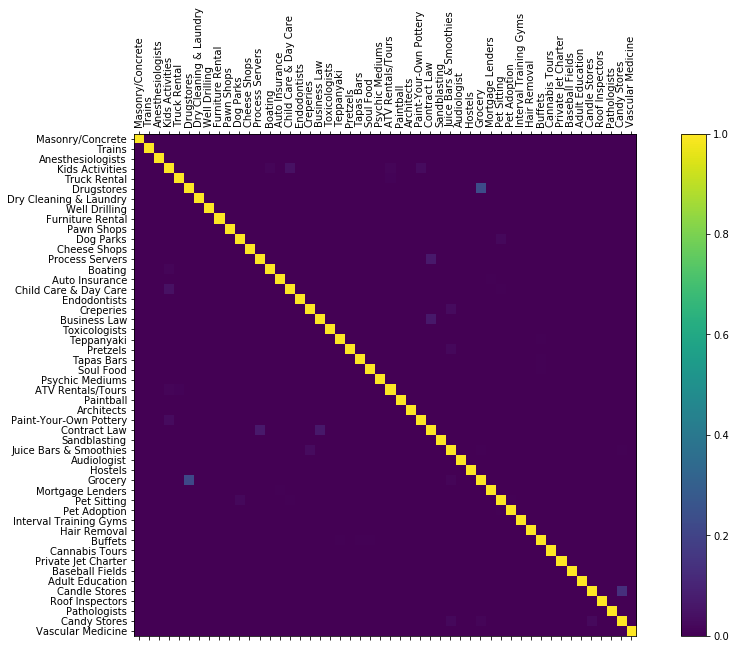

In [10]:
f = plt.figure(figsize=(16, 9))
plt.matshow(df_corr_matrix, fignum=f.number)
plt.xticks(range(df_corr_matrix.shape[1]), df_corr_matrix.columns, rotation=90)
plt.yticks(range(df_corr_matrix.shape[1]), df_corr_matrix.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)